In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import diagsvd
import matplotlib.pyplot as plt
import os
os.chdir('/Users/sosuke/Downloads')
from pca import pca
from scipy.linalg import fractional_matrix_power
from sklearn.cross_decomposition import CCA
from scipy.spatial import distance_matrix

In [2]:
# Columns of the dataset
col_6 = ["GPA", "GMAT", "admit"]

# Dataset
gsbdata = pd.read_table('p6.txt', delimiter = '  ', names = col_6)

/Users/sosuke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [3]:
gsb_1 = gsbdata[gsbdata['admit'] == 1].loc[:, ["GPA", "GMAT"]]
gsb_2 = gsbdata[gsbdata['admit'] == 2].loc[:, ["GPA", "GMAT"]]
gsb_3 = gsbdata[gsbdata['admit'] == 3].loc[:, ["GPA", "GMAT"]]

In [4]:
mean = np.dot(np.transpose(gsbdata.loc[:, ["GPA", "GMAT"]]), np.ones(len(gsbdata)))/len(gsbdata)
mean_1 = np.dot(np.transpose(gsb_1), np.ones(len(gsb_1)))/len(gsb_1)
mean_2 = np.dot(np.transpose(gsb_2), np.ones(len(gsb_2)))/len(gsb_2)
mean_3 = np.dot(np.transpose(gsb_3), np.ones(len(gsb_3)))/len(gsb_3)

$\bar{x_1}$, $\bar{x_2}$, and $\bar{x_3}$ are

In [5]:
mean_1, mean_2, mean_3

(array([  3.41193548, 561.22580645]),
 array([  2.46821429, 447.07142857]),
 array([  2.99269231, 446.23076923]))

$\bar{x}$ is given as

In [6]:
mean

array([  2.97282353, 488.44705882])

In [7]:
S_pool = ((len(gsb_1) - 1)*gsb_1.cov()+(len(gsb_2) - 1)*gsb_2.cov()+(len(gsb_3) - 1)*gsb_3.cov())/(len(gsbdata)-3)

$W = (n-3)S_{pool}$, therefore $W$ and $W^{-1}$ are

In [8]:
W = (len(gsbdata)-3)*S_pool
W

,GPA,GMAT
GPA,3.127406,-150.916131
GMAT,-150.916131,299783.891882


In [9]:
W_in = np.linalg.inv(W)
W_in

array([[3.27714937e-01, 1.64977078e-04],
       [1.64977078e-04, 3.41878843e-06]])

$B$ is given as

In [10]:
B = len(gsb_1)*np.outer((mean_1 - mean),(mean_1 - mean)) \
+len(gsb_2)*np.outer((mean_2 - mean),(mean_2 - mean))+len(gsb_3)*np.outer((mean_3 - mean),(mean_3 - mean))

Eigenvalues and eigenvectors of $W^{-1}B$ are given by its EVD as follows.

In [11]:
eigval, eigvec = np.linalg.eigh(np.dot(W_in, B))
eigval = np.flip(eigval)
eigvec = np.flip(eigvec, axis=1)

In [12]:
eigval

array([4.55504688, 1.13993176])

In [13]:
eigvec

array([[-0.9999976 ,  0.00218884],
       [-0.00218884, -0.9999976 ]])

Define the new observations as follows.

In [14]:
x_1 = np.array([3.21, 497])
x_2 = np.array([3.22, 497])

Applying the classification rule to x_1, we get

In [15]:
abs(np.dot(eigvec[:, 0], x_1 - mean_1)), abs(np.dot(eigvec[:, 0], x_1 - mean_2)), abs(np.dot(eigvec[:, 0], x_1 - mean_3))

(0.3425147040081663, 0.8510693503823167, 0.3284326495221429)

which tells us that x_1 is classified to 3, which is waitlist.

Applying the classification rule to x_2, we get

In [16]:
abs(np.dot(eigvec[:, 0], x_2 - mean_1)), abs(np.dot(eigvec[:, 0], x_2 - mean_2)), abs(np.dot(eigvec[:, 0], x_2 - mean_3))

(0.3325147279631917, 0.8610693264272913, 0.33843262556711745)

which tells us that x_2 is classified to 1, which is yes (admit).

Text(0, 0.5, 'GMAT')

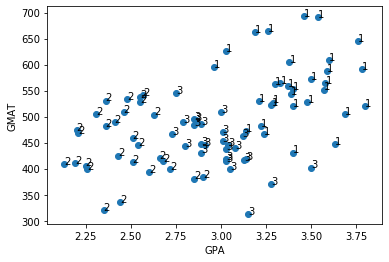

In [17]:
fig, ax = plt.subplots()
ax.scatter(gsbdata.loc[:, "GPA"], gsbdata.loc[:, "GMAT"])
for i, txt in enumerate(gsbdata.loc[:, "admit"]):
    ax.annotate(txt, (gsbdata.loc[i, "GPA"], gsbdata.loc[i, "GMAT"]), fontsize=10)
ax.set_xlabel('GPA')
ax.set_ylabel('GMAT')

The scatterplot shows that the higher the GMAT score and GPA are, the more likely you get admitted.
The result from C shows that 0.01 difference in GPA changes the outcome of the admission. This is probably not an ideal admission policy since your career and your whole life may be affected by that small difference in your GPA.